## Adatok beolvasása

Importok:

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import hashlib
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
#from scipy.stats import randint as sp_randint
from collections import Counter
from mpl_toolkits.basemap import Basemap
from folium.plugins import HeatMap
import folium
from geopy.geocoders import Nominatim
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
def load_data(path):
 csv_path = os.path.join(path, "zomato.csv")
 return pd.read_csv(csv_path)

zomato = load_data("datasets")

Adatok összekeverése annak érdekében, hogy esetleges mintákat elimináljuk a kezdeti adatbázisban.

In [3]:
zomato = shuffle(zomato)
zomato.reset_index(inplace=True, drop=True)

In [4]:
backup_zomato = zomato.copy()

In [5]:
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/r-s-lunch-hom...,"Near Poornima Theatre, 1st Cross, Lalbagh Road...",R S Lunch Home,No,No,3.4/5,11,080 41144374,Shanti Nagar,Quick Bites,NaN,South Indian,300,"[('Rated 5.0', 'RATED\n This restaurant is ve...",[],Dine-out,Brigade Road
1,https://www.zomato.com/cafe-remix?context=eyJz...,Delivery Only,Cafe Remix,No,No,NaN,0,+91 9831810463,Koramangala,Delivery,NaN,"Mexican, Italian",600,[],[],Delivery,Koramangala 7th Block
2,https://www.zomato.com/bangalore/the-coffee-be...,"1st Floor, 1 MG Road Mall, Trinity Circle, Opp...",The Coffee Bean & Tea Leaf,Yes,No,3.8/5,260,+91 8022086888,MG Road,Cafe,"Coffee, Sandwiches, Blueberry Muffin, Pancakes...",Cafe,700,"[('Rated 4.0', 'RATED\n Hello. This is our re...",[],Cafes,Church Street
3,https://www.zomato.com/bangalore/shades-of-cof...,"187, Shop 3, 22nd Cross, 9th Main, Sector 7, H...",Shades Of Coffee,No,No,NaN,0,+91 9663730974\r\n+91 8861221284,HSR,Quick Bites,NaN,"Desserts, Sandwich, Fast Food, Beverages",300,"[('Rated 5.0', 'RATED\n Almond cake + Coffee ...",[],Dine-out,HSR
4,https://www.zomato.com/bangalore/king-electron...,"34/2, Keerthana Apartment, Behind XIME College...",King,Yes,No,3.7/5,570,080 49653308,Electronic City,Quick Bites,Matar Paneer,"North Indian, Chinese",300,"[('Rated 3.0', ""RATED\n I only order delivery...",[],Delivery,Electronic City
5,https://www.zomato.com/bangalore/oye-amritsar-...,"Shop 19, Ground Floor, Kalpak Arcade, Church S...",Oye Amritsar,Yes,Yes,4.1/5,452,+91 9036025211,Church Street,Casual Dining,"Lassi, Aloo Paratha, Jalebi, Palak Paneer, Che...",North Indian,600,"[('Rated 3.0', 'RATED\n Now this is a small p...",[],Delivery,Church Street
6,https://www.zomato.com/bangalore/city-durbar-j...,"76/1, 30th Cross, Tilak Nagar Main Road, Jayan...",City Durbar,Yes,No,3.7/5,72,080 22458877,Jayanagar,Casual Dining,"Chicken Grill, Ghee Rice","North Indian, Chinese, Biryani",450,"[('Rated 5.0', 'RATED\n Very very good taste ...",[],Dine-out,BTM
7,https://www.zomato.com/bangalore/eat-eroo-sout...,"Home Town, Outer Ring Road, Marathahalli, Bang...",Eat Eroo - South China,Yes,No,3.8 /5,370,+91 8970222000\n+91 9036700012,Marathahalli,Quick Bites,"Dabeli, Veg Manchow Soup, Momos, Hakka Noodles...","South Indian, Chinese",350,"[('Rated 4.0', ""RATED\n It's a good Chinese f...",[],Dine-out,Marathahalli
8,https://www.zomato.com/bangalore/night-kitchen...,"Shop 458, Chowk Street, Shivajinagar",Night Kitchen,No,No,NaN,0,+91 8217784247,Shivajinagar,Quick Bites,NaN,"North Indian, Fast Food, Chinese",600,[],[],Dine-out,Lavelle Road
9,https://www.zomato.com/bangalore/royals-biryan...,"3,11th Cross, Maruthi Nagar, 1st Stage, BTM, B...",Royal's Biryani,Yes,No,NaN,0,+91 9980871513,BTM,Quick Bites,NaN,Biryani,300,"[('Rated 4.0', 'RATED\n An amazing biryani pl...",[],Delivery,Koramangala 6th Block


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [7]:
print(len(set(zomato['url'])))
print(len(set(zomato['name'])))
print(len(set(zomato['phone'])))
print(zomato['rate'].value_counts())

51717
8792
14927
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1 /5    1474
4.1/5     1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
4.9 /5      30
2.4 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64


## A feleslegesnek vélt attribútumok eldobása

In [8]:
zomato = zomato.drop(['url',  'phone', 'location', 'rest_type', 'reviews_list', 'menu_item'], axis=1)

## Az adatbázis tanító és teszt szettekre felbontásáért felelős függvények

In [9]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
 return data.loc[~in_test_set], data.loc[in_test_set]

def test_set_check(identifier, test_ratio, hash):
 return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


## Szöveges oszlopok átalakítására való függvények

In [10]:
def yesNoConverter(column):
    encoder=LabelEncoder()
    column_converted=encoder.fit_transform(column)
    return column_converted

In [11]:
def label_factorize(df):
    for col in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes', 'listed_in(type)', 'listed_in(city)'])]:
        df[col] = df[col].factorize()[0]
    return df

In [12]:
def one_hotTransformer(zomato_encoded):
    encoder = OneHotEncoder(categories='auto')
    zomato_cat_1hot = encoder.fit_transform(zomato_encoded.reshape(-1,1))
    return zomato_cat_1hot

In [13]:
type_labels = list()
city_labels = list()

def labelEncoder(column, city):
    global type_labels
    global city_labels
    encoder = LabelEncoder()
    zomato_cat_encoded = encoder.fit_transform(column)
    if city:
        city_labels = list(encoder.classes_)
    else:
        type_labels = list(encoder.classes_)
    
    return zomato_cat_encoded

## A 'rate' oszlop megtisztítására való függvény

Eredetileg '4.1 / 5', 'NEW', '-', '3.5/5' formákban találhatóak az adatok.
Ezekből csak az első tag kellene, a szöveges információkat pedig nan értékekkel helyettesítjük.

In [14]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def cleanRates(data):
    if(isinstance(data, float)):
        return data
    else:
        cleanData = data.translate({ord(c): None for c in string.whitespace})
        vote = cleanData.split('/')
        if (isfloat(vote[0])):
            return float(vote[0])
        else:
            return np.nan

## Medián kiszámítására használatos függvény

Minden olyan adatot, amit később fel kell használni a teszt szettel való műveletek során, egy-egy globális dictionary-be mentjük el.
Az egyes oszlopokhoz tartozó értékek az oszlop neve alapján érthetőek el (ez a kulcs).

In [15]:
def calculateMedianByColumnName(column, column_name):
    items_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if not np.isnan(x):
            items_cleaned.append(x)
            
    global median      
    median[column_name] = np.median(items_cleaned)
    return median[column_name]

In [16]:
# csak inicializálás, hogy meglegyenek globálisan
median = dict()

def replaceNanByMedian(column, column_name, training):
    if training:
        global median
        median[column_name] = calculateMedianByColumnName(column, column_name)
        
    column_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if np.isnan(x):
            column_cleaned.append(median[column_name])
        else:
            column_cleaned.append(x)
    return column_cleaned

## Standard és MinMax skálázó függvények

In [17]:
# csak inicializálás, hogy meglegyenek globálisan
mean = dict()
variance = dict()

def standardScaler(column, column_name, training):
    if training:
        global mean
        mean[column_name] = np.mean(column)
        global variance
        variance[column_name] = np.var(column)
        
    standardizedCol = []
    for x in column:
        standardizedCol.append((x - mean[column_name]) / variance[column_name])
   
    return standardizedCol

In [18]:
# csak inicializálás, hogy meglegyenek globálisan
min_value = dict()
max_value = dict()

def Normalize(column, column_name, training):
    if training:
        global min_value
        min_value[column_name] = float(column.min())
        global max_value
        max_value[column_name] = float(column.max())
        
    column_substract = []
    for x in column:
        column_substract.append((float(x)-min_value[column_name])/(max_value[column_name]-min_value[column_name]))
    return column_substract

### Apróbb függvény, ami a tizedesvesszőt tartalmazó számadatokból kiveszi a tizedesvesszőt. (Tizedesvesszővel string formátumban vannak)

In [19]:
def ConvertFromMoneyToString(column):
    column_converted = []
    for x in column:
        if not isfloat(x):
            x = x.replace(",", "")
            column_converted.append(float(x))
        else:
            column_converted.append(float(x))
    return column_converted

## Az eredmények megjelenítéséért felelős függvények

In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")

In [21]:
def displayLinRegPredictions(lin_reg, train_set_ready_df, labels_ready):
    some_data = train_set_ready_df.iloc[:5]
    #some_data = train_set.iloc[:5]
    some_labels = pd.DataFrame(data=labels_ready).iloc[:5]

    print("Predictions:\t", lin_reg.predict(train_set_ready_df.iloc[:5]))
    print("Labels:\t\t", some_labels)
    print("\n")

In [22]:
statistic_table = pd.DataFrame()

def printToStatistics(name, rmse, details, pg, mean='Nan', sd='NaN'):
    global statistic_table 
    statistic_table = statistic_table.append({'name' : name , 
                                              'rmse' : rmse , 
                                              'details' : details,
                                              'mean' : mean,
                                              'standard deviation' : sd,
                                              'purging' : pg
                                             } , ignore_index=True)

In [23]:
test_statistic_table = pd.DataFrame()

def printToTestStatistics(name, score):
    global test_statistic_table 
    test_statistic_table = test_statistic_table.append({'name' : name , 
                                              'score' : score
                                             } , ignore_index=True)

## Saját pipeline egy függvény formájában

A szükséges helyeken a hiányzó értékeket -1-ekkel töltjük fel, mert ez adta a legjobb eredményt. 
A paraméterben megadható skálázóval skálázzuk a megfelelő attribútumokat az adat "megtisztítása" után (pl. string --> float).
Némely paraméterre OneHot kódolót is használunk, mert így sikerült a legjobb eredményt elérni.
Miután minden paramétert feldolgoztunk, egy mátrixot rakunk össze a paraméterekből.

In [24]:
# csak hogy globális legyen
zomato_labels =  []

def runPipeline(dataset, training, scaler):
    dataset_ready = dataset.copy()
    
    dataset_ready = label_factorize(dataset_ready)
    #dataset_ready = dataset_ready.drop(['rate'], axis=1).fillna(-1) #filling nan values by -1
    dataset_ready['name'] = dataset_ready['name'].fillna(-1)
    dataset_ready['cuisines'] = dataset_ready['cuisines'].fillna(-1)
    dataset_ready['dish_liked'] = dataset_ready['dish_liked'].fillna(-1)
    dataset_ready['address'] = dataset_ready['address'].fillna(-1)
    
    dataset_ready['online_order'] = yesNoConverter(dataset_ready['online_order'])
    dataset_ready['book_table'] = yesNoConverter(dataset_ready['book_table'])
    
    dataset_type_encoded = labelEncoder(dataset_ready['listed_in(type)'], False)
    dataset_type_encoded_oneHot = one_hotTransformer(dataset_type_encoded)
        
    dataset_city_encoded = labelEncoder(dataset_ready['listed_in(city)'], True)
    dataset_city_encoded_oneHot = one_hotTransformer(dataset_city_encoded)
    
    dataset_ready['approx_cost(for two people)'] = ConvertFromMoneyToString(dataset_ready['approx_cost(for two people)'])
    dataset_ready['approx_cost(for two people)'] = replaceNanByMedian(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['approx_cost(for two people)'] = scaler(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['name'] = scaler(dataset_ready['name'], "name", training)
    dataset_ready['address'] = scaler(dataset_ready['address'], "address", training)
    dataset_ready['dish_liked'] = scaler(dataset_ready['dish_liked'], "dish_liked", training)
    dataset_ready['cuisines'] = scaler(dataset_ready['cuisines'], "cuisines", training)
    dataset_ready['votes'] = scaler(dataset_ready['votes'], "votes", training)
    dataset_num = dataset_ready.drop(['listed_in(type)', 'listed_in(city)', 'rate'], axis=1)
    dataset_ready = np.concatenate((np.concatenate((dataset_num, dataset_type_encoded_oneHot.toarray()), axis=1), dataset_city_encoded_oneHot.toarray()), axis=1)
    return dataset_ready

## Az adat betanítására, majd a betanított adatbázison modelleken való futtatására vaó függvény

Nem ad vissza adatot, futás közben az összes modellel produkált eredményt sorban kiírja.

In [25]:
def trainDataWithGivenScalerAndRunAllModels(dataset, labels, scaler, details, purging):
    dataset_ready = runPipeline(dataset, True, scaler)
    dataset_ready_df = pd.DataFrame(dataset_ready)
    
    # Lineáris regresszió    
    lin_reg = LinearRegression(n_jobs = -1)
    lin_reg.fit(dataset_ready, labels)
    train_set_predictions = lin_reg.predict(dataset_ready_df)
    lin_mse = mean_squared_error(labels, train_set_predictions)
    lin_rmse = np.sqrt(lin_mse)
    printToStatistics('LinearRegression', lin_rmse, details, purging, lin_rmse)
    print("Linear Regression with", details)
    displayLinRegPredictions(lin_reg, dataset_ready_df, labels)
    
    # Döntési fa
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(dataset_ready, labels)
    train_set_predictions = tree_reg.predict(dataset_ready_df)
    tree_mse = mean_squared_error(labels, train_set_predictions)
    tree_rmse = np.sqrt(tree_mse)
    decision_tree_scores = cross_val_score(tree_reg, dataset_ready_df, labels, scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-decision_tree_scores)
    printToStatistics('DecisionTreeRegressor', tree_rmse, details, purging, tree_rmse_scores.mean(), tree_rmse_scores.std())
    print("Decision Tree with", details)
    display_scores(tree_rmse_scores)
    
    # Random forest
    forest_reg = RandomForestRegressor(10, n_jobs = -1)
    forest_reg.fit(dataset_ready_df, pd.DataFrame(data=labels).values.ravel())
    train_set_predictions = forest_reg.predict(dataset_ready_df)
    forest_mse = mean_squared_error(labels, train_set_predictions)
    forest_rmse = np.sqrt(forest_mse)
    forest_scores = cross_val_score(forest_reg, dataset_ready_df, pd.DataFrame(data=labels).values.ravel(), scoring="neg_mean_squared_error", cv=10)
    forest_rmse_scores = np.sqrt(-forest_scores)
    printToStatistics('RandomForestRegressor', forest_rmse, details, purging, forest_rmse_scores.mean(), forest_rmse_scores.std())
    print("Random forest with", details)
    display_scores(forest_rmse_scores)

## Vizualizáló függvények

Attribútumok fontosságát vizualizáló függvény

In [26]:
def plot_importances(model, cols):
    plt.figure(figsize=(12,6))
    f_imp = pd.Series(model.feature_importances_, index=cols).sort_values(ascending=True)
    f_imp.plot(kind='barh')

Az éttermeket térképen elhelyező vizualizáció alapjának generálását végző függvény.

In [27]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

## Az adatbázis kezdeti feldolgozása

Cél attribútum üres értéket tartalmazó soroait eldobjuk (ehhez előbb szükséges az értékelések átalakítása nekünk megfelelő (4.1/5 --> 4.1) formába).
Majd tanító és teszt szettekre bontása.

In [28]:
#MAIN
dataset = zomato.copy()
cleaned_rate_labels = []
        
dataset = dataset.loc[dataset['rate'] !='NEW']
dataset = dataset.loc[dataset['rate'] !='-'].reset_index(drop=True)

for n in dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset['rate'] = cleaned_rate_labels
dataset = dataset.drop(dataset[np.isnan(dataset['rate'])].index)

dataset = dataset.reset_index()

train_set, test_set = split_train_test_by_id(dataset, 0.2, "index")

train_labels = train_set['rate']
train_set = train_set.drop('index', axis=1)
test_labels = test_set['rate']
test_set = test_set.drop('index', axis=1)

In [29]:
train_labels

0        3.4
1        3.8
4        3.7
5        3.8
6        3.2
8        3.8
9        4.0
10       4.2
11       4.0
13       3.4
14       4.0
15       4.3
16       3.5
17       3.8
18       4.1
19       3.1
20       3.7
21       4.4
22       3.9
24       4.4
25       4.4
27       4.1
28       3.4
29       3.3
30       3.5
31       3.5
32       3.3
33       4.2
34       3.7
35       3.5
        ... 
41629    2.9
41630    3.9
41631    3.3
41633    4.3
41634    2.4
41635    4.1
41636    3.6
41637    3.2
41638    4.0
41639    3.9
41640    3.7
41641    3.1
41642    4.0
41643    2.8
41644    4.3
41645    3.7
41646    3.0
41647    3.7
41648    3.8
41650    3.3
41651    3.4
41652    3.3
41653    3.6
41656    4.5
41657    3.3
41658    2.7
41659    4.4
41660    4.4
41663    3.3
41664    3.7
Name: rate, Length: 33073, dtype: float64

In [30]:
dataset.shape

(41665, 12)

41665 darab adatsorunk marad. A többiben hiányos volt a 'rate' oszlop értéke.

## A modellek kipróbálása mindkét skálázóval

Meghívja a runPipeline()-t, majd egyesével futtatja a feldolgozott adathalmazt a modelleken.

In [31]:
print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, Normalize, "MinMaxNorm with Basic Data", "No")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, standardScaler, "StandardScaler with Basic Data", "No")

Running Models with MinMax
Linear Regression with MinMaxNorm with Basic Data
Predictions:	 [3.5322876  3.82797241 3.62417603 3.53173828 3.61828613]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with MinMaxNorm with Basic Data
Scores: [0.19777328 0.20149832 0.19745203 0.18017899 0.19208719 0.18406425
 0.18729691 0.18762759 0.20179119 0.22557255]
Mean: 0.19553423054490457
Standard deviation: 0.012228270590522396


Random forest with MinMaxNorm with Basic Data
Scores: [0.1705352  0.15284979 0.16310192 0.1516252  0.16220826 0.15675227
 0.16058415 0.15564657 0.16367057 0.16304138]
Mean: 0.1600015322240316
Standard deviation: 0.005470977287648641


Running Models with StandardScaler
Linear Regression with StandardScaler with Basic Data
Predictions:	 [3.53237169 3.82830063 3.62400147 3.53156298 3.6183495 ]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with StandardScaler with Basic Data
Scores: [0.19559848 0.19570664 0.19662355 0.1805143

A modellek által elért rmse- és mean-értékek ábrázolva. Mindegyikből 2 van, mert a két különböző skálázóval közel azonos hiba-értékeket értek el a modellek.

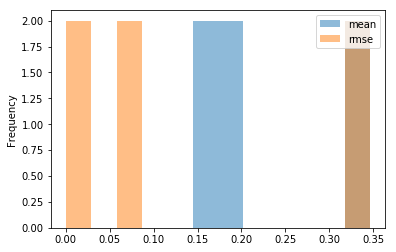

In [32]:
%matplotlib inline
ax = statistic_table.plot.hist(bins=12, alpha=0.5)

## A 'votes' oszlopból a kiugró értékek helyettesítése az általunk megadott maximum értékkel, majd a modellek ismételt futtatása a 'purgált' adatbázissal

In [33]:
#PURGÁLÁS
zomato_with_id = zomato.reset_index()
purged_dataset = dataset.copy()
#purged_dataset = dataset.drop(dataset[dataset["votes"] > 5000].index)
purged_dataset["votes"].where(purged_dataset["votes"] < 5000, 5000, inplace=True)
print(purged_dataset.shape)
purged_dataset = purged_dataset.reset_index()

second_train_set, second_test_set = split_train_test_by_id(purged_dataset, 0.2, "index")
second_train_labels = second_train_set['rate']
second_train_set = second_train_set.drop('index', axis=1)
second_test_labels = second_test_set['rate']
second_test_set = second_test_set.drop('index', axis=1)

print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels,  Normalize, "MinMaxNorm with Purged Data", "Yes")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels, standardScaler, "StandardScaler  with Purged Data", "Yes")

(41665, 12)
Running Models with MinMax
Linear Regression with MinMaxNorm with Purged Data
Predictions:	 [3.52964421 3.82731836 3.61842014 3.54517639 3.60830786]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with MinMaxNorm with Purged Data
Scores: [0.22811726 0.20820532 0.2076383  0.20518675 0.19348318 0.19016489
 0.1969836  0.196384   0.20557692 0.25018892]
Mean: 0.20819291525050398
Standard deviation: 0.01727228220980637


Random forest with MinMaxNorm with Purged Data
Scores: [0.1937478  0.17297123 0.17182418 0.16516561 0.17175502 0.1591237
 0.1699299  0.16383677 0.17358883 0.19251899]
Mean: 0.17344620271895617
Standard deviation: 0.010770660047543307


Running Models with StandardScaler
Linear Regression with StandardScaler  with Purged Data
Predictions:	 [3.5296442  3.82731836 3.61842013 3.54517639 3.60830787]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with StandardScaler  with Purged Data
Scores: [0.22497481 0.21052994 0.

Látható, hogy a purgált adatbázison (minden, 5000 szavazatnál többel rendelkező adatsorban 5000-re cseréltük a szavazatszámot) minden modell, bármely skálázót is alkalmaztuk, rosszabb eredményt ért el.

A purgálás után során úgy tűnik, negatív módon torzítjuk aza adatot, mely az eredmények romlásához vezetett.

## Feldolgozott (fit hívás) adatbázisok elmentése későbbi használatra

In [34]:
train_set_ready_with_minmax = runPipeline(train_set, True, Normalize)

train_set_ready_with_standard_scaler = runPipeline(train_set, True, standardScaler)

In [35]:
print(train_set_ready_with_minmax.shape)
print(train_set_ready_with_minmax)

(33073, 45)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.18008025e-04 1.55496812e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.36016049e-04 3.10993625e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.20462591e-03 1.19732545e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.06820864e-03 4.04291712e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.81968374e-01 7.28813559e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## Korrelációs mátrix vizsgálata

In [36]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels + ['rate']
basic_data_for_corr_matrix_df = pd.DataFrame(train_set_ready_with_standard_scaler)
train_labels = train_labels.reset_index(drop=True)
basic_data_for_corr_matrix_df['rate'] = train_labels
basic_data_for_corr_matrix_df.columns = attributes
corr_matrix = basic_data_for_corr_matrix_df.corr()
corr_matrix["rate"].sort_values(ascending=False)

rate                           1.000000
votes                          0.432673
book_table                     0.420374
approx_cost(for two people)    0.381403
dish_liked                     0.343012
cuisines                       0.124694
Drinks & nightlife             0.117851
Buffet                         0.090337
Pubs and bars                  0.089844
Cafes                          0.077782
online_order                   0.070071
Church Street                  0.044678
MG Road                        0.041999
Desserts                       0.041625
Brigade Road                   0.040971
Lavelle Road                   0.037546
Koramangala 5th Block          0.034745
Koramangala 4th Block          0.033878
Residency Road                 0.033656
Koramangala 6th Block          0.032669
Koramangala 7th Block          0.028307
Indiranagar                    0.022318
Old Airport Road               0.009908
Malleshwaram                   0.008273
Frazer Town                    0.007605


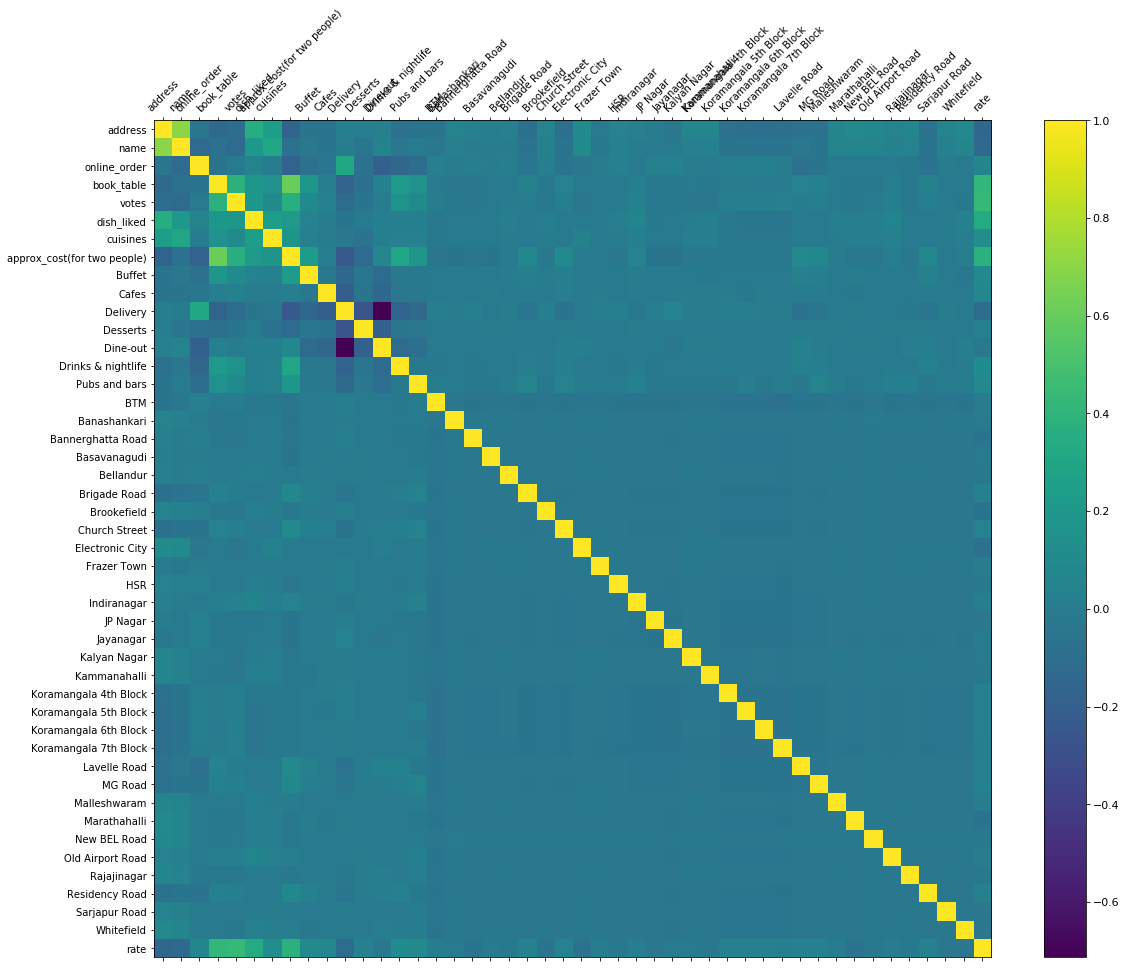

In [37]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10, rotation=45)
plt.yticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)

In [38]:
imprtant_attributes = corr_matrix["rate"].sort_values(ascending=False)[:10]
imprtant_attributes = imprtant_attributes.append(corr_matrix["rate"].sort_values(ascending=False)[-7:])
columns_to_keep = imprtant_attributes.index
corr_matrix = corr_matrix.drop(columns=corr_matrix.columns.difference(columns_to_keep))
corr_matrix = corr_matrix.drop(index=corr_matrix.index.difference(columns_to_keep))

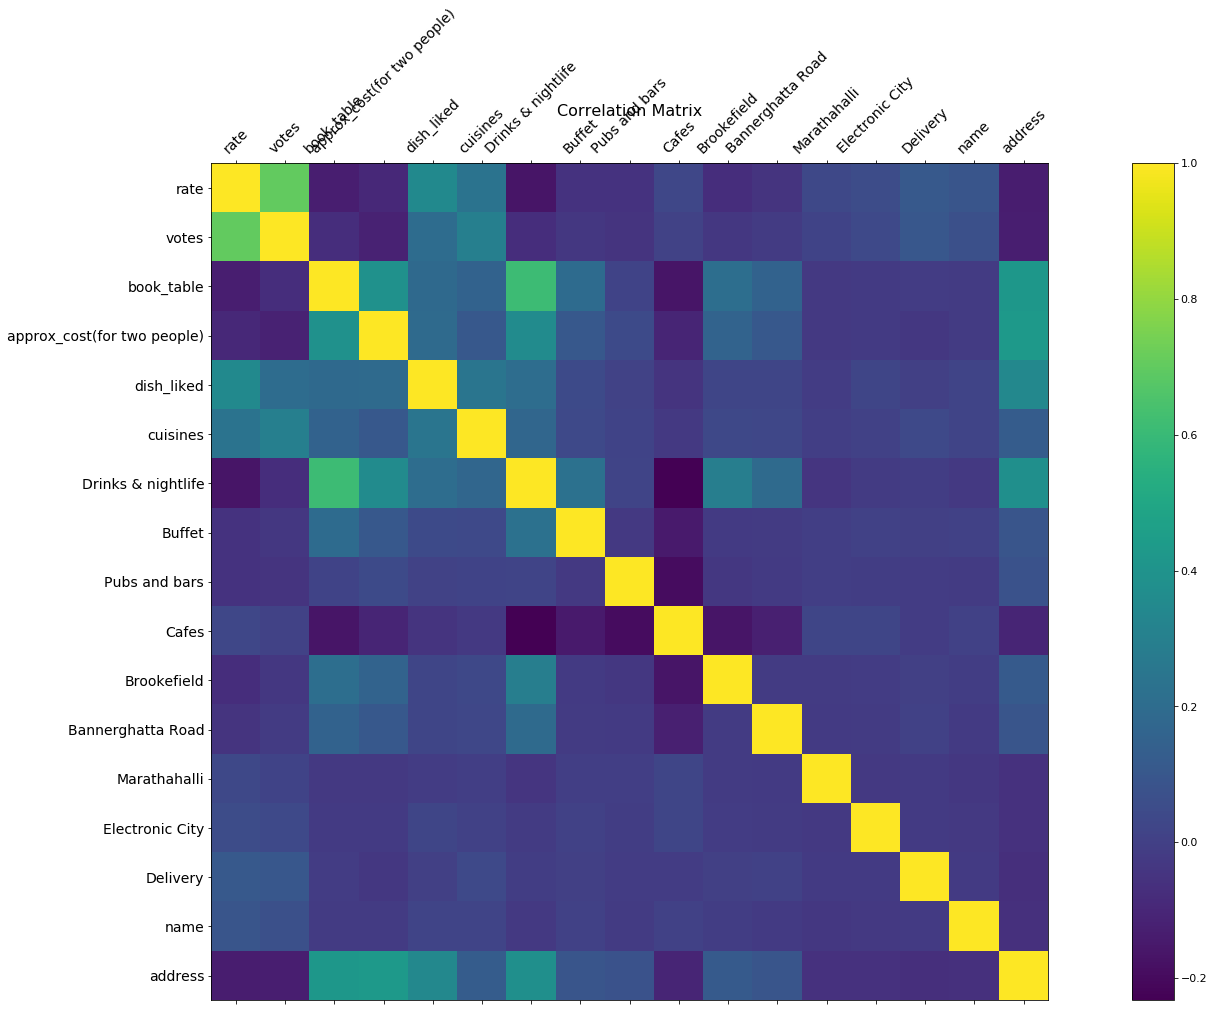

In [39]:
f = plt.figure(figsize=(30, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(17), columns_to_keep, fontsize=14, rotation=45)
plt.yticks(range(17), columns_to_keep, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

## Modellek elért eredményeinek táblázata

Látható, hogy a RandomForestRegressor éri el konzekvensen a legjobb eredményt, s tizedekkel bár, de a nem purgált dataset-en való, standard skálázást használó verziója a legjobb.

In [40]:
statistic_table

,details,mean,name,purging,rmse,standard deviation
0,MinMaxNorm with Basic Data,0.346572,LinearRegression,No,3.465725e-01,NaN
1,MinMaxNorm with Basic Data,0.195534,DecisionTreeRegressor,No,5.751305e-16,0.0122283
2,MinMaxNorm with Basic Data,0.160002,RandomForestRegressor,No,6.550389e-02,0.00547098
3,StandardScaler with Basic Data,0.346573,LinearRegression,No,3.465726e-01,NaN
4,StandardScaler with Basic Data,0.194249,DecisionTreeRegressor,No,5.745029e-16,0.0108489
5,StandardScaler with Basic Data,0.159580,RandomForestRegressor,No,6.538259e-02,0.0042315
6,MinMaxNorm with Purged Data,0.343360,LinearRegression,Yes,3.433600e-01,NaN
7,MinMaxNorm with Purged Data,0.208193,DecisionTreeRegressor,Yes,5.670120e-16,0.0172723
8,MinMaxNorm with Purged Data,0.173446,RandomForestRegressor,Yes,6.948002e-02,0.0107707
9,StandardScaler with Purged Data,0.343360,LinearRegression,Yes,3.433600e-01,NaN


## Legjobb hiperparaméterek keresése a legjobb eddigi modellhez (Basic Dataset)

RandomForestRegressor modellhez hiperparaméterek keresése GridSearchCV class segítségével:

In [41]:
param_grid = [
     {'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]},
 ]
forest_reg = RandomForestRegressor(n_jobs = -1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(train_set_ready_with_standard_scaler, train_labels)

/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/jobli

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [43]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.25954663497949043 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.25909586037401294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.2538335371687397 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.2121972026236119 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.2077318662256663 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.20204534686550402 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.16093121871698865 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.1552740009408323 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.1514176275965444 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.1514176275965444


RandomForestRegressor modellhez hiperparaméterek keresése RandomSearchCV class segítségével:

(mivel sokáig fut, és mindig azonos eredményt ért el, mint a gridSerachCV, így kikommenteztük)

In [44]:
#from sklearn.model_selection import RandomizedSearchCV
#forest_reg = RandomForestRegressor()
#from scipy.stats import randint as sp_randint
#param_dist = {
 #             "max_features": sp_randint(2, 45),
  #            "bootstrap": [True, False],
  #            'n_estimators': sp_randint(3, 10)}
#n_iter_search = 10
#rand_search = RandomizedSearchCV(forest_reg,param_distributions=param_dist, n_iter=n_iter_search, cv=10, scoring='neg_mean_squared_error')
#rand_search.fit(train_set_ready_with_minmax, train_labels)


## Csak a vizualizáció kedvéért újra lefuttatás

A legjobb becslő (modell + hiperparaméterek) által tippelt és a valós rate értékek közötti átlagos hiba ábrázolása.

In [45]:
best_predictions = grid_search.best_estimator_.predict(train_set_ready_with_standard_scaler)
abs_error_array = abs(best_predictions - train_labels)

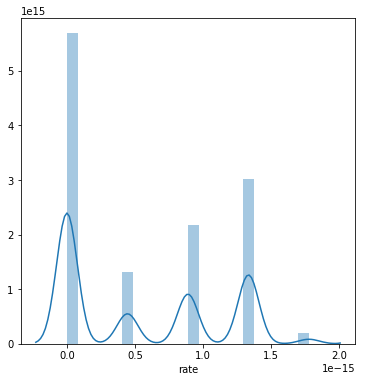

In [46]:
plt.figure(figsize=(6,6))
sns.distplot(abs_error_array)
plt.show()

A legjobb becslő által, cross validation során elért rmse-átlagértékek ábrázolva:

In [47]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, train_set_ready_with_standard_scaler, train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)

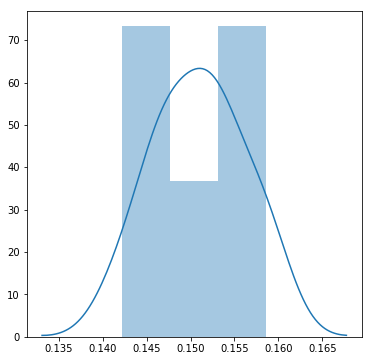

In [48]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

## Az egyes attribútumok 'fontossága' a predikcióban

A legjobb becslő által fontosnak gondolt feature-ök elemzése

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2848575036551229, 'votes'),
 (0.19204901894909418, 'dish_liked'),
 (0.10099752800659925, 'cuisines'),
 (0.09335839885479504, 'name'),
 (0.09289860872506542, 'address'),
 (0.09119483226999278, 'approx_cost(for two people)'),
 (0.04159278555494844, 'book_table'),
 (0.014273541376411255, 'online_order'),
 (0.006302118996674115, 'Desserts'),
 (0.005161541462164824, 'Delivery'),
 (0.004739230632727573, 'Brookefield'),
 (0.004540073358187883, 'Marathahalli'),
 (0.0038830115794893276, 'Dine-out'),
 (0.0038689614470730667, 'Whitefield'),
 (0.0037781756006626437, 'Electronic City'),
 (0.0034297846350527157, 'Indiranagar'),
 (0.003298279855520193, 'Old Airport Road'),
 (0.0030742730747266565, 'Sarjapur Road'),
 (0.002894489834547326, 'Bannerghatta Road'),
 (0.0027478169445137915, 'Bellandur'),
 (0.002738446240962742, 'Cafes'),
 (0.0026840819691895572, 'Malleshwaram'),
 (0.0026341692386001717, 'HSR'),
 (0.0025633239724240295, 'Buffet'),
 (0.0022455898649132665, 'New BEL Road'),
 (0.0022147600

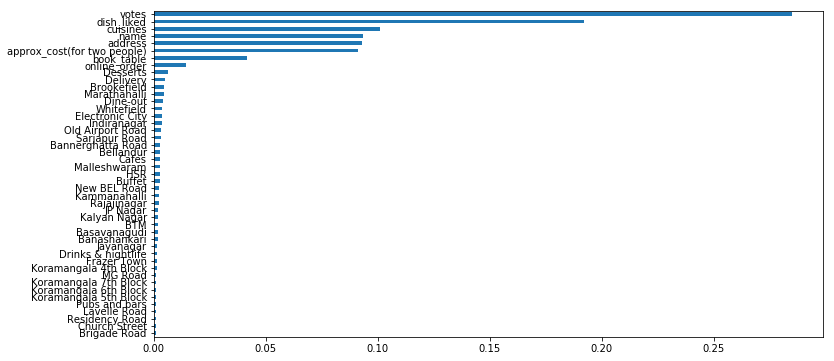

In [50]:
plot_importances(grid_search.best_estimator_, attributes)

## Végül a teszt szetten futtatás, mérés (Basic dataset)

In [51]:
final_model = grid_search.best_estimator_

X_test = runPipeline(test_set, False, standardScaler)
y_test = test_labels

In [52]:
print(len(y_test))
X_test_df = pd.DataFrame(X_test)
final_predictions = final_model.predict(X_test_df)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Basic Data", final_rmse)

8592
Scores: 0.3365320020560024
Mean: 0.3365320020560024
Standard deviation: 0.0




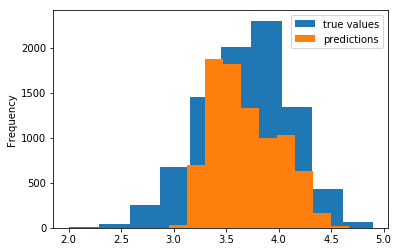

In [53]:
y_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Model vizsgálata, mi alapján dönt a döntési fa

In [54]:
def convert_dot_to_png(model, max_depth=5, feature_names=list(attributes)):
    export_graphviz(model.estimators_[0], out_file='tree.dot', max_depth=max_depth, feature_names=feature_names, rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')

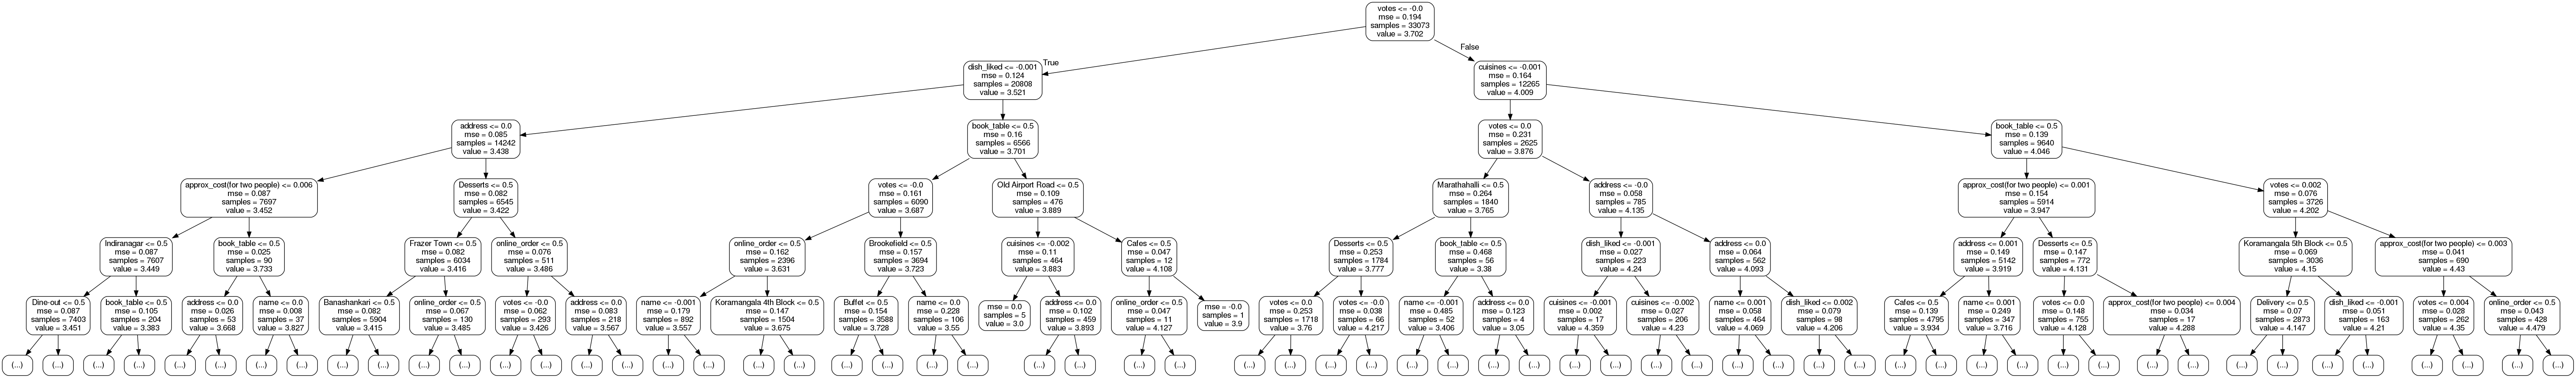

In [55]:
convert_dot_to_png(final_model)
Image('tree.png')

## Lokáció (GPS koordináták) hozzáadása

Geopy segítségével a lokációk koordiánátinak lekérése.

In [56]:
def get_lat_lon(df):
    locations=pd.DataFrame({"Name":zomato['location'].unique()})
    locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
    lat=[]
    lon=[]
    geolocator=Nominatim(user_agent="app")
    for location in locations['Name']:
        location = geolocator.geocode(location)
        if location is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:    
            lat.append(location.latitude)
            lon.append(location.longitude)
    locations['lat']=lat
    locations['lon']=lon
    return locations

In [58]:
zomato_loc = backup_zomato.copy()
locations=pd.DataFrame({"Name":zomato_loc['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon

In [59]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name,geo_loc
0,Shanti Nagar,"(12.9575547, 77.5979099)"
1,Koramangala,"(13.2923988, 77.7519261)"
2,MG Road,"(12.9741854, 77.6124135)"
3,HSR,"(12.91445305, 77.6426938363703)"
4,Electronic City,"(12.9791198, 77.5912997)"


In [60]:
Rest_locations=pd.DataFrame(zomato_loc['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [61]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [62]:
basemap

A helyek összepárosítása a gps koordinátákkal.

In [63]:
loc_dict = dict(zip(zomato_loc['location'].unique(), locations['geo_loc']))
loc_array = list()
for x in zomato_loc['location']:
    loc_array.append(loc_dict[x])

NaN értékek lecserélése (-1, -1)-ekre a gps koordinátáknál.

In [64]:
nan_free_loc_array = []
for x in loc_array:
    if(x != x):
        nan_free_loc_array.append((-1, -1))
    else:
        nan_free_loc_array.append(x)

## Új dataset létrehozása (Lat Lon dataset), azon szokásos feldolgozás elvégzése

In [65]:
extended_dataset = zomato.copy()
cleaned_rate_labels = []

list_of_lat = [x[0] for x in nan_free_loc_array]
list_of_lon = [x[1] for x in nan_free_loc_array]

extended_dataset['lat'] = list_of_lat
extended_dataset['lon'] = list_of_lon

extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='NEW']
extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='-'].reset_index(drop=True)

for n in extended_dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
extended_dataset['rate'] = cleaned_rate_labels
extended_dataset = extended_dataset.drop(extended_dataset[np.isnan(extended_dataset['rate'])].index)

extended_dataset = extended_dataset.reset_index()

extended_train_set, extended_test_set = split_train_test_by_id(extended_dataset, 0.2, "index")

extended_train_labels = extended_train_set['rate']
extended_train_set = extended_train_set.drop('index', axis=1)
extended_test_labels = extended_test_set['rate']
extended_test_set = extended_test_set.drop('index', axis=1)

Az új attribútumok skálázása külön, hiszen ez előtt meghívva nem léteznek még, így a függvényben nem kivitelezhető.

Skálázatlan oszlopok kimentése a későbbi vizualizációra való felhasználásra.

In [66]:
not_scaled_extended_train_set = pd.DataFrame()
not_scaled_extended_train_set['lat'] = extended_train_set['lat']
not_scaled_extended_train_set['lon'] = extended_train_set['lon']

extended_train_set['lat'] = standardScaler(extended_train_set['lat'], "lat", True)
extended_train_set['lon'] = standardScaler(extended_train_set['lon'], "lon", True)

extended_test_set['lat'] = standardScaler(extended_test_set['lat'], "lat", False)
extended_test_set['lon'] = standardScaler(extended_test_set['lon'], "lon", False)


A nem új feature-ökhöz tartozó adat végigfuttatása a Pipeline-on, majd modellek kpróbálása, feldolgozott dataset elmentése (extended_train_set_ready_with_standard_scaler).

In [67]:
trainDataWithGivenScalerAndRunAllModels(extended_train_set, extended_train_labels,  standardScaler, "StandardScaler with Lat Lon Data", "No")

Linear Regression with StandardScaler with Lat Lon Data
Predictions:	 [3.52293241 3.81873159 3.62095789 3.53033273 3.61276578]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with StandardScaler with Lat Lon Data
Scores: [0.18771199 0.17526108 0.19693848 0.16473123 0.20230005 0.18497378
 0.18357897 0.18254658 0.18803007 0.21573988]
Mean: 0.18818121099384671
Standard deviation: 0.013475174656674091


Random forest with StandardScaler with Lat Lon Data
Scores: [0.15192806 0.14965589 0.15409044 0.14508873 0.15781985 0.14712875
 0.15246329 0.14859436 0.15354958 0.16033464]
Mean: 0.15206536005227717
Standard deviation: 0.0044595176595557656




In [68]:
extended_train_set_ready_with_standard_scaler = runPipeline(extended_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Lat Lon dataset)

In [69]:
grid_search.fit(extended_train_set_ready_with_standard_scaler, extended_train_labels)

/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.2379044671891943 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.2321994332424752 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.23069214253701859 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.1913853063525479 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.1863322587999604 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.18332810801791807 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.1413815647918781 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.1380665647689789 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.13670300804632507 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.13670300804632507


## A legjobb becslő általi eredmények megjelenítése (Lat Lon dataset)

In [71]:
best_predictions = grid_search.best_estimator_.predict(extended_train_set_ready_with_standard_scaler)

In [72]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, extended_train_set_ready_with_standard_scaler, extended_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

array([0.13592641, 0.13036054, 0.13531679, 0.12928498, 0.14162901,
       0.13249162, 0.13819419, 0.13527903, 0.13627083, 0.1365846 ])

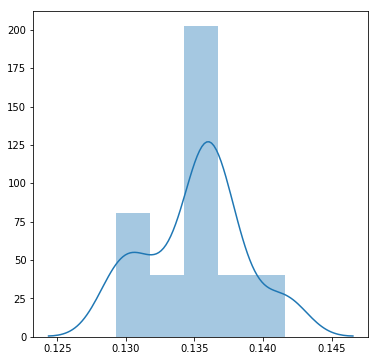

In [73]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [74]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'lat', 'lot'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2848575036551229, 'votes'),
 (0.19204901894909418, 'dish_liked'),
 (0.10099752800659925, 'cuisines'),
 (0.09335839885479504, 'name'),
 (0.09289860872506542, 'address'),
 (0.09119483226999278, 'approx_cost(for two people)'),
 (0.04159278555494844, 'book_table'),
 (0.014273541376411255, 'online_order'),
 (0.006302118996674115, 'Cafes'),
 (0.005161541462164824, 'Buffet'),
 (0.004739230632727573, 'Bellandur'),
 (0.004540073358187883, 'MG Road'),
 (0.0038830115794893276, 'Delivery'),
 (0.0038689614470730667, 'Residency Road'),
 (0.0037781756006626437, 'Brookefield'),
 (0.0034297846350527157, 'Frazer Town'),
 (0.003298279855520193, 'Marathahalli'),
 (0.0030742730747266565, 'Rajajinagar'),
 (0.002894489834547326, 'BTM'),
 (0.0027478169445137915, 'Bannerghatta Road'),
 (0.002738446240962742, 'lot'),
 (0.0026840819691895572, 'Lavelle Road'),
 (0.0026341692386001717, 'Electronic City'),
 (0.0025633239724240295, 'lat'),
 (0.0022455898649132665, 'Malleshwaram'),
 (0.0022147600058211015, 'Jayan

## Teszt lefuttatása végül, eredmény kijelzése (Lat Lon dataset)

8592
Scores: 0.3418872204519787
Mean: 0.3418872204519787
Standard deviation: 0.0




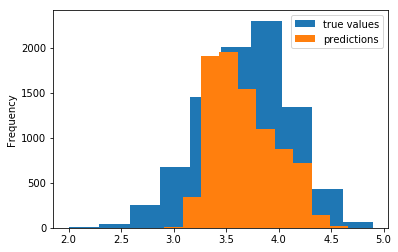

In [75]:
final_model = grid_search.best_estimator_

X_extended_test = runPipeline(extended_test_set, False, standardScaler)
y_extended_test = extended_test_labels
print(len(y_test))
X_extended_test_df = pd.DataFrame(X_extended_test)
final_predictions = final_model.predict(X_extended_test_df)
final_mse = mean_squared_error(y_extended_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Lat Lon Data", final_rmse)
y_extended_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## K-Means klaszterezéssel GPS koordináták csoportokba sorolása

Az előbb elmentett "extended_train_set" felhasználása, belőle a 'lat' és a 'lon' feature-ök kinyerése

In [76]:
coord_cols_train_df = pd.DataFrame()
coord_cols_train_df['lat'] = extended_train_set['lat']
coord_cols_train_df['lon'] = extended_train_set['lon']

In [77]:
coord_cols_train = np.array(coord_cols_train_df)

### Klaszterezés lefuttatása

In [78]:
km = KMeans()
y_km = km.fit_predict(coord_cols_train)

### Klaszterezés megjelenítése koordináták alapján

In [79]:
coord_cols_df = pd.DataFrame()
coord_cols_df['lat'] = not_scaled_extended_train_set['lat']
coord_cols_df['lon'] = not_scaled_extended_train_set['lon']
coord_cols_ = np.array(coord_cols_df)

Kiszedjük a -1-es sorokat, hogy meg tudjuk állapítani a legkisebb értékeket, amikkel körbehatárolhatjuk a térképet a vizualizációnál.

In [80]:
coord_cols_del = [x for x in coord_cols_ if x[0] != -1.0] 

In [81]:
lower_lat = min(coord_cols_del, key = lambda t: t[1])[1] 
lower_lon = min(coord_cols_del, key = lambda t: t[0])[0]
upper_lat = max(coord_cols_del, key = lambda t: t[1])[1]
upper_lon = max(coord_cols_del, key = lambda t: t[0])[0]

In [82]:
print(lower_lat)
print(lower_lon)
print(upper_lat)
print(upper_lon)

77.4333346
12.9055682
77.7519261
13.3457317


Kiszedjük az egyedi értékeket (először tuple formába konvertáljuk, hogy megmaradjanak az adatkettesek), a hozzájuk tartozó "zónákkal" párban.

In [83]:
tuple_coords = []
for x in coord_cols_:
    tuple_coords.append((x[0], x[1]))
unique_tuple_coords = np.unique(tuple_coords, return_index = True, axis = 0)   
unique_y_km = []
for x in unique_tuple_coords[1]:
    unique_y_km.append(y_km[x])

Kiíratjuk, mely zónába hány, egyedi koordináátkkal rendelkező étterem van (ennyi pontunk lesz)

In [84]:
Counter(unique_y_km)

Counter({1: 1, 6: 9, 0: 9, 7: 10, 4: 26, 3: 12, 5: 10, 2: 2})

Kirajzoltatjuk az egyedi koordinátákat (hiszen nem lehet/ nincs értelme ugyanazt a pontot többször), különböző zónákat különböző színnel. Itt viszont az eredeti koordinátákat kell felhasználnunk, hiszen a skálázott értékekkel nem lehet jól vizualizálni.

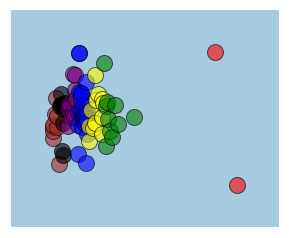

In [85]:
m=Basemap(llcrnrlon = lower_lon - 0.1, llcrnrlat = lower_lat - 0.1, urcrnrlon = upper_lon + 0.1 , urcrnrlat = upper_lat + 0.1)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

for coord, zona in zip(unique_tuple_coords[0], unique_y_km):
    if zona == 0:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="black", markeredgecolor="black", markeredgewidth=1)
    if zona == 1:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
    if zona == 2:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=1)
    if zona == 3:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="yellow", markeredgecolor="black", markeredgewidth=1)
    if zona == 4:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="blue", markeredgecolor="black", markeredgewidth=1)
    if zona == 5:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="green", markeredgecolor="black", markeredgewidth=1)
    if zona == 6:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="brown", markeredgecolor="black", markeredgewidth=1)
    if zona == 7:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="purple", markeredgecolor="black", markeredgewidth=1)
        

## Új dataset létrehozása  (Zones dataset), azon szokásos feldolgozás elvégzése

In [86]:
dataset_with_zones = zomato.copy()
cleaned_rate_labels = []

dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='NEW']
dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='-'].reset_index(drop=True)

for n in dataset_with_zones['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset_with_zones['rate'] = cleaned_rate_labels
dataset_with_zones = dataset_with_zones.drop(dataset_with_zones[np.isnan(dataset_with_zones['rate'])].index)

dataset_with_zones = dataset_with_zones.reset_index()

zones_train_set, zones_test_set = split_train_test_by_id(dataset_with_zones, 0.2, "index")

zones_train_labels = zones_train_set['rate']
zones_train_set = zones_train_set.drop('index', axis=1)
zones_train_set['zone'] = y_km
zones_test_labels = zones_test_set['rate']
zones_test_set = zones_test_set.drop('index', axis=1)

In [87]:
trainDataWithGivenScalerAndRunAllModels(zones_train_set, zones_train_labels,  standardScaler, "StandardScaler with Zones Data", "No")

Linear Regression with StandardScaler with Zones Data
Predictions:	 [3.52357492 3.82456646 3.6181203  3.52622417 3.61953553]
Labels:		    rate
0   3.4
1   3.8
4   3.7
5   3.8
6   3.2


Decision Tree with StandardScaler with Zones Data
Scores: [0.18742995 0.17566595 0.1886918  0.16865859 0.19629159 0.18594393
 0.19313905 0.17415397 0.18277834 0.19806289]
Mean: 0.18508160593652934
Standard deviation: 0.009281595053801125


Random forest with StandardScaler with Zones Data
Scores: [0.15943948 0.14975272 0.1567278  0.14775285 0.15997326 0.15101031
 0.15616792 0.14975042 0.15929482 0.16419425]
Mean: 0.15540638283521122
Standard deviation: 0.005231164456129608




Az adatok végigfuttatása a Pipeline-on, feldolgozott dataset elmentése (zones_train_set_ready_with_standard_scaler).

In [88]:
zones_train_set_ready_with_standard_scaler = runPipeline(zones_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Zones dataset)

In [89]:
grid_search.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.25303133427934704 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.24457468547410832 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.2464962444865589 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.20725628570266635 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.19714097556512 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.19399738504105818 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.15339045147930572 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.14737307422894474 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.14456815105457296 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.14456815105457296


## A legjobb becslő általi eredmények megjelenítése (Zones dataset)

In [91]:
best_predictions = grid_search.best_estimator_.predict(zones_train_set_ready_with_standard_scaler)

In [92]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, zones_train_set_ready_with_standard_scaler, zones_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

array([0.14704889, 0.14044701, 0.14976395, 0.14128027, 0.15133103,
       0.13846042, 0.14358332, 0.13558539, 0.14166253, 0.14603123])

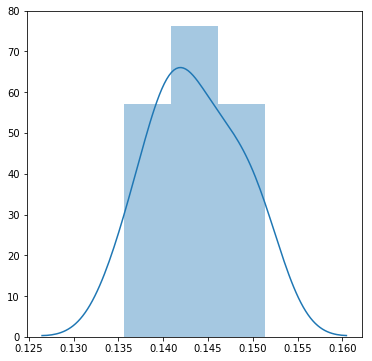

In [93]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [94]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'zones'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2848575036551229, 'votes'),
 (0.19204901894909418, 'dish_liked'),
 (0.10099752800659925, 'cuisines'),
 (0.09335839885479504, 'name'),
 (0.09289860872506542, 'address'),
 (0.09119483226999278, 'approx_cost(for two people)'),
 (0.04159278555494844, 'book_table'),
 (0.014273541376411255, 'online_order'),
 (0.006302118996674115, 'Delivery'),
 (0.005161541462164824, 'Cafes'),
 (0.004739230632727573, 'Brigade Road'),
 (0.004540073358187883, 'Malleshwaram'),
 (0.0038830115794893276, 'Desserts'),
 (0.0038689614470730667, 'Sarjapur Road'),
 (0.0037781756006626437, 'Church Street'),
 (0.0034297846350527157, 'HSR'),
 (0.003298279855520193, 'New BEL Road'),
 (0.0030742730747266565, 'Residency Road'),
 (0.002894489834547326, 'Banashankari'),
 (0.0027478169445137915, 'Basavanagudi'),
 (0.002738446240962742, 'Buffet'),
 (0.0026840819691895572, 'MG Road'),
 (0.0026341692386001717, 'Frazer Town'),
 (0.0025633239724240295, 'zones'),
 (0.0022455898649132665, 'Marathahalli'),
 (0.0022147600058211015, 

## Test set-hez zónák predikciója KNN algo-val

In [95]:
X_loc = coord_cols_train.copy()
y_loc = y_km.copy()

Először a train szettet is szétszedjük és azon betanítjuk a K Nearest Neighbors klaszterezésre használt modellt, majd ellenőrizzük is helyes működését.

In [96]:
X_loc_train, X_loc_test, y_loc_train, y_loc_test = train_test_split(X_loc, y_loc, test_size=0.20) 

In [97]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_loc_train, y_loc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [98]:
y_pred = classifier.predict(X_loc_test)  

Amint látni, 100%-ig egyeznek a prediktált értékek. Így feltételezhetjük, hogy a test set adatsoraihoz is helyesen fogja megjósolni a zónákat

In [99]:
print(confusion_matrix(y_loc_test, y_pred))  
print(classification_report(y_loc_test, y_pred)) 

[[ 702    0    0    0    0    0    0    0]
 [   0  133    0    0    0    0    0    0]
 [   0    0  725    0    0    0    0    0]
 [   0    0    0  563    0    0    0    0]
 [   0    0    0    0 2060    0    0    0]
 [   0    0    0    0    0  255    0    0]
 [   0    0    0    0    0    0 1587    0]
 [   0    0    0    0    0    0    0  590]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00       725
           3       1.00      1.00      1.00       563
           4       1.00      1.00      1.00      2060
           5       1.00      1.00      1.00       255
           6       1.00      1.00      1.00      1587
           7       1.00      1.00      1.00       590

   micro avg       1.00      1.00      1.00      6615
   macro avg       1.00      1.00      1.00      6615
weighted avg       1.00      1.00      1.00      6615



A teszt szetten is megjósoljuk a kategóriákat és hozzáadjuk a teszt szetthez az oszlopot.

In [100]:
coord_cols_test_df = pd.DataFrame()
coord_cols_test_df['lat'] = extended_test_set['lat']
coord_cols_test_df['lon'] = extended_test_set['lon']
coord_cols_test = np.array(coord_cols_test_df)

y_test_pred = classifier.predict(coord_cols_test)  

In [101]:
zones_test_set['zones'] = y_test_pred

## Teszt lefuttatása végül, eredmény kijelzése (Zones dataset)

8592
Scores: 0.33584637394914035
Mean: 0.33584637394914035
Standard deviation: 0.0




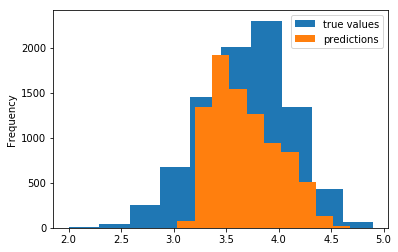

In [102]:
final_model = grid_search.best_estimator_

X_zones_test = runPipeline(zones_test_set, False, standardScaler)
y_zones_test = zones_test_labels
print(len(y_test))
X_zones_test_df = pd.DataFrame(X_zones_test)
final_predictions = final_model.predict(X_zones_test_df)
final_mse = mean_squared_error(y_zones_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Zones Data", final_rmse)
y_zones_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Elért eredmények újabb csekkolása

In [103]:
statistic_table.sort_values(by=['mean'])

,details,mean,name,purging,rmse,standard deviation
14,StandardScaler with Lat Lon Data,0.152065,RandomForestRegressor,No,6.207333e-02,0.00445952
17,StandardScaler with Zones Data,0.155406,RandomForestRegressor,No,6.418333e-02,0.00523116
5,StandardScaler with Basic Data,0.159580,RandomForestRegressor,No,6.538259e-02,0.0042315
2,MinMaxNorm with Basic Data,0.160002,RandomForestRegressor,No,6.550389e-02,0.00547098
11,StandardScaler with Purged Data,0.171873,RandomForestRegressor,Yes,7.204655e-02,0.00927806
8,MinMaxNorm with Purged Data,0.173446,RandomForestRegressor,Yes,6.948002e-02,0.0107707
16,StandardScaler with Zones Data,0.185082,DecisionTreeRegressor,No,5.837390e-16,0.0092816
13,StandardScaler with Lat Lon Data,0.188181,DecisionTreeRegressor,No,6.022072e-16,0.0134752
4,StandardScaler with Basic Data,0.194249,DecisionTreeRegressor,No,5.745029e-16,0.0108489
1,MinMaxNorm with Basic Data,0.195534,DecisionTreeRegressor,No,5.751305e-16,0.0122283


In [104]:
test_statistic_table.sort_values(by=['score'])

,name,score
2,Test with Zones Data,0.335846
0,Test with Basic Data,0.336532
1,Test with Lat Lon Data,0.341887


## Ensamble Methods

### BaggingRegressor

Megadható, hogy hány darab, és milyen modellt használjon. Minden modellt betanít a train set egy részét felhaználva, majd maga a modell kimenete az egyes modellek által jósolt eredményekból adódik. A kiválasztás menete lehetséges soft voting vagy hard voting alkalmazása által. 

Osztályzási problémák esetén a hard voting során a legtöbb szavaztot kapott oszály lesz az output, soft voting esetén pedig minden oszályhoz tartozik egy valószínűség (ha ilyet képesek mondani a modellek, amiket használ), és ezek közül a legnagyobb valószínűségű osztály nyer.

Regressziós feladat során lehet hard voting-ot alkalmazni, vagy a prediktált értékek mediánját/átlagát venni.

Az, hogy a train set mely részét használja fel, a bootstrap értékétől függ. Ha True, akkor bagging van, azaz lehetséges, hogy a random kiválasztott adatsorok között ugyanaz az adatsor többször is előfordul egy betanítandó mdellhez tartozó train subset-ben, míg ha False, akkor pasting van, azaz nem lehetséges többszörös előfordulása egy adatsornak egy subset-ben. Ettől függetlenül pasting során is kiveheti ugyanazt az adatsort több alkalommal a modell, de csak különböző modellekhez tartozó subsetek alkotása során.

In [165]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
bag_reg_pred = bag_reg.predict(zones_train_set_ready_with_standard_scaler)
bag_reg_mse = mean_squared_error(zones_train_labels, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
print(bag_reg_mse)
print(bag_reg.oob_score_)


0.04824157341816049
0.9117321730964998


In [166]:
bag_reg_pred = bag_reg.predict(X_zones_test)
bag_reg_mse = mean_squared_error(y_zones_test, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
print(bag_reg_mse)

0.3352316104907968


## Ada boost

Megadható, milyen modellekből építezzen. n_estimator számú modellt hoz létre, melyek közül az elsőt egyszerűen betanítja az étteremadatok-label párossal úgy, hogy minden adatsor súlya egységnyi. Eztán a következő modellnél az adatsorok súlyai úgy frissülnek, hogy a nem eltalált adatsorok súlyai nőnek, azaz nagyobb hangsúlyt fektet a modell ezeknek az eltalálására.

Megpróbáljuk megtalálni a legjobb paramétereket (tanulási ráta, becslők száma)
(Amennyiben megadjuk az AdaBoost konstruktorában, hogy pl. DecisionTreeRegressor(max_depth=1)-et használjon, akkor az eredmény sokkal rosszabb lesz (0.333x --> 0.37x)

In [188]:
param_dist = {
 'n_estimators': [25, 50, 100],
 'learning_rate' : [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.037, 0.04, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=6,
 n_iter = 20,
 n_jobs=-1)

pre_gs_inst.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
print(pre_gs_inst.best_estimator_)
best_ada_reg = pre_gs_inst.best_estimator_
ada_reg_pred = best_ada_reg.predict(zones_train_set_ready_with_standard_scaler)
ada_reg_mse = mean_squared_error(zones_train_labels, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
print(ada_reg_mse)


AdaBoostRegressor(base_estimator=None, learning_rate=0.03, loss='linear',
         n_estimators=50, random_state=None)
0.3330633511799436


In [189]:
#best_ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=50, learning_rate=0.2)
#best_ada_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)

In [190]:
ada_reg_pred = best_ada_reg.predict(X_zones_test)
ada_reg_mse = mean_squared_error(y_zones_test, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
print(ada_reg_mse)

0.33337718177333575


## Gradiens boosting 

n_estimators számú DecisionTree-t hoz létre, mindegyiknél jelenleg egy döntést hoz(max_depth=2), és mindet sorban a előző hibáival tanítja be. Azaz, az első fa még a normális étteremadatok-label párost kapja be, a második fa viszont már az étterem adatai mellé nem a rate-értékeket, hanem az első fa által, rate tippelés közben okozott hibákat kapja be, és így tovább az összes fa során. Végül a modell predikciója az összes fa predikcijóinak összege.

Amennyiben a becslők számát felvesszük 100-200 fölé, akkor egyre inkább overfittelni fog (a tanító adatokon egyre jobb, miközben a teszten egyre rosszabb eredményekkel szolgál). 

Lásd Hands-o-Machine Learning könyv 211. és 212. oldal ábrák.

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost_zones_train, gradboost_zones_val, gradboost_zones_train_labels, gradboost_zones_val_labels = train_test_split(zones_train_set_ready_with_standard_scaler, zones_train_labels)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gbrt.fit(gradboost_zones_train, gradboost_zones_train_labels)
    
errors = [mean_squared_error(gradboost_zones_val_labels, y_pred) 
          for y_pred in gbrt.staged_predict(gradboost_zones_val)]
bst_n_estimators = np.argmin(errors)
print(bst_n_estimators)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(gradboost_zones_train, gradboost_zones_train_labels)
gbrt_best_pred = gbrt_best.predict(gradboost_zones_train)
gbrt_best_mse = mean_squared_error(gradboost_zones_train_labels, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
gbrt_best_mse

99


0.31571719057399683

In [220]:
gbrt_best_pred = gbrt_best.predict(X_zones_test)
gbrt_best_mse = mean_squared_error(y_zones_test, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
gbrt_best_mse

0.32656690920228526

## Gradiens boosting korai megállítással

Itt addig megyünk, amíg javulást észlelünk a jóslatokon, amennyiben azonban egyre nagyobb hibát vét, akkor leállítjuk idő előtt, ezzel sok felesleges számítást megspórolva.

In [215]:
stopped_gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    stopped_gbrt.n_estimators = n_estimators
    stopped_gbrt.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
    y_pred = stopped_gbrt.predict(X_zones_test)
    val_error = mean_squared_error(zones_test_labels, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 4:
            break # early stopping

In [216]:
print("Number of estimators at the stop:", stopped_gbrt.n_estimators)
final_predictions = stopped_gbrt.predict(X_zones_test)
final_mse = mean_squared_error(y_zones_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Zones Data Early Stopped Gradient Boosting", final_rmse)

Number of estimators at the stop: 41
Scores: 0.32839585009480504
Mean: 0.32839585009480504
Standard deviation: 0.0




Tehát úgy néz ki, hogy ha 38-41 db becslő az optimális.

## Stacking

Az egyszerűség kedvéért csak 2 szintű stacking modelt raktunk össze. A 0. szinten vannak a döntési fa és a lineáris regresszió modellek, az 1. szinten pedig a logisztikai regresszió.

Mindezt a zónákkal bővített adatszetten vizsgáljuk meg.

In [280]:
def Stacking(model, train, y, test, n_fold):
    folds = StratifiedKFold(n_splits=n_fold, random_state=1)
    test_pred = np.empty((test.shape[0], 1), float)
    train_pred = np.empty((0, 1), float)
    for train_indices, val_indices in folds.split(train, y):
        x_train, x_val = train.iloc[train_indices], train.iloc[val_indices]
        y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

        model.fit(X=x_train, y=y_train)
        train_pred = np.append(train_pred, model.predict(x_val))
        test_pred = np.append(test_pred, model.predict(test))
    return test_pred.reshape(-1, 1), train_pred

In [281]:
model1 = DecisionTreeRegressor(random_state=1)

zones_train_labels_transpose = np.array([zones_train_labels]).T

test_pred1, train_pred1 = Stacking(
    model=model1,
    n_fold=10,
    train=zones_train_set_ready_with_standard_scaler,
    test=X_zones_test,
    y=zones_train_labels_transpose)

train_pred1 = pd.DataFrame(train_pred1)
test_pred1 = pd.DataFrame(test_pred1)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [258]:
model2 = LinearRegression(n_jobs=-1)

test_pred2, train_pred2 = Stacking(
    model=model2,
    n_fold=10,
    train=zones_train_set_ready_with_standard_scaler,
    test=X_zones_test,
    y=zones_train_labels)

train_pred2 = pd.DataFrame(train_pred2)
test_pred2 = pd.DataFrame(test_pred2)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [259]:
model1_with_model2_df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = RandomForestRegressor(random_state=1, n_jobs=-1)
model.fit(df, zones_train_labels)
model.score(df_test, zones_test_labels)

NameError: name 'train_pred1' is not defined

In [282]:
asd = np.array([zones_train_labels])

print(zones_train_labels_transpose)

[[3.4]
 [3.8]
 [3.7]
 ...
 [4.4]
 [3.3]
 [3.7]]
